# 😎 야나두 셀럽!

나도 될 수 있다, 셀러브리티! <br>
나와 닮은 셀럽을 찾아보자.

<br>

## 목차

1. 데이터 준비하기
2. 얼굴 임베딩
3. 닮은 얼굴 찾기
4. 결론 및 회고

In [2]:
# 필요한 모듈 불러오기
import os
import random
import warnings
warnings.filterwarnings(action='ignore')

import face_recognition
import numpy as np
import cv2

from IPython.display import Image
import PIL

import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.font_manager as fm

%matplotlib inline

In [2]:
# 이미지 파일의 한글 제목을 출력하기 위해 폰트 설정해주기
# 그에 앞서 어떤 폰트가 있는지 살펴본다
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

print(font_list)

['/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Oblique.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/Nanum

In [3]:
# 무난한 폰트를 골라 변수에 저장해둔다
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

<br>

## 1. 데이터 준비하기

- 셀럽 283명 + 내 사진 3장 = 총 286장의 사진을 준비했다.

In [3]:
dir_path = os.getenv('HOME') + '/aiffel/aiffel_projects/data/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print("이미지 파일 개수:", len(file_list))

이미지 파일 개수: 286


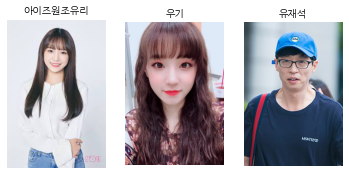

In [5]:
# 어떤 얼굴들이 있는지 랜덤하게 출력해보기
rand_file = random.sample(file_list, 3)

for idx, file in enumerate(rand_file):
    img_path = os.path.join(dir_path, file)
    
    image = PIL.Image.open(img_path)
    
    plt.subplot(1, 3, idx+1)
    plt.title(file.split('.')[0], fontproperties=fontprop)    # 아까 저장해둔 폰트 적용
    plt.axis('off')
    plt.imshow(image)

<br>

## 2. 얼굴 임베딩

### 1) 이미지의 얼굴 영역 자르기

- **get_cropped_face() 함수**
    - 이미지 파일이 있는 경로를 파라미터로 받는다.
    - face_recognition의 face_locations 메서드를 이용해 얼굴 영역의 좌표(top, right, bottom, left)를 받는다.
    - 해당 좌표로 슬라이싱해서 이미지에서 얼굴 영역만 자른다.

In [7]:
# 이미지의 얼굴 영역만 잘라주는 함수
def get_cropped_face(image_path):
    # 이미지 가져와서 image 변수에 저장
    image = face_recognition.load_image_file(image_path)
    
    # 이미지의 얼굴 영역 좌표를 받아 각 변수 a, b, c, d에 저장
    face_locations = face_recognition.face_locations(image)
        
    # face detection이 되지 않은 경우에는 빈 리스트를 반환
    if face_locations == []:
        return []

    # 각 얼굴 영역의 좌표를 변수에 할당
    a, b, c, d = face_locations[0]
    
    # 얼굴 영역 좌표로 슬라이싱하여 해당 영역 자르기
    cropped_face = image[a:c, d:b, :]
    
    return cropped_face

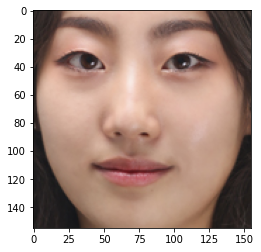

In [34]:
# 위 함수를 이용해 얼굴 영역만 잘라서 출력해보기
image_path = os.path.join(dir_path, '손지숙.jpg')
face = get_cropped_face(image_path)

plt.imshow(face)

### 2) 얼굴 임베딩 벡터 구하기

- **get_face_embedding() 함수**
    - face_recognition의 face_encodings() 메서드를 이용해 얼굴 영역의 임베딩 벡터를 구한다.

In [39]:
# 얼굴 영역의 임베딩 벡터 구하는 함수
# 아래 error의 경우 제외시키기 위해 None을 반환한다
# RuntimeError: Unsupported image type, must be 8bit gray or RGB image.
def get_face_embedding(face):
    try:
        return face_recognition.face_encodings(face)
    except RuntimeError:
        return None

In [9]:
# 임베딩 벡터의 차원 살펴보기
embedding = get_face_embedding(face)
len(embedding[0])

128

In [21]:
# 어떻게 생겼는지 살펴보기
print(embedding[0])

[-0.08008198  0.04049783  0.02346427 -0.15139246 -0.15072931 -0.05515524
 -0.0650446  -0.09341101  0.14143898 -0.17438789  0.14505522 -0.11308139
 -0.15555377 -0.00831052 -0.11408898  0.16395533 -0.15220509 -0.12239529
 -0.0329346   0.00570097  0.08489172  0.03855203 -0.05427989  0.02727849
 -0.10633293 -0.28794315 -0.12584765 -0.00399236 -0.0276093  -0.04363017
 -0.00744638  0.06550848 -0.1793329  -0.0026399   0.02401585  0.12314217
  0.00543914 -0.09423141  0.12031598  0.02370927 -0.24502622  0.04381318
  0.08086938  0.23192725  0.17836742 -0.03035993  0.01823913 -0.17105219
  0.14153191 -0.1294632  -0.01657384  0.1513889   0.01789075  0.0588098
  0.02041954 -0.07889814  0.06476992  0.130776   -0.09787194  0.00141516
  0.14808673 -0.01117792 -0.04940415 -0.16026039  0.1971942   0.04034511
 -0.1408128  -0.22642726  0.15189718 -0.16281596 -0.09797297  0.04430228
 -0.16549964 -0.15767981 -0.24198875  0.01235617  0.3662414   0.1502201
 -0.13835679  0.10884573 -0.03961879  0.00319098  0.1

In [94]:
# get_face_embedding() 함수가 의도대로 exception을 잘 처리하는지 확인
image_path = os.path.join(dir_path, '산들.jpeg')
face = get_cropped_face(image_path)

embedding = get_face_embedding(face)

# None이 반환되었으므로 정상 작동했음을 알 수 있다
assert embedding == None

<br>

- **get_embedding_dict() 함수**
    - 디렉터리 내의 모든 이미지들의 임베딩 벡터를 구하고, 딕셔너리에 저장한다.
    - 디렉터리의 파일 중 이미지 파일이 아닌 것은 제외한다.
    - 빠른 실행을 위해 이미 딕셔너리에 있는 이름은 갱신하지 않는다.
    - 얼굴 detection이 되지 않은 이미지는 RuntimeError를 일으키므로 제외한다.
    - 임베딩이 잘 된 경우에는 {사람 이름: 임베딩 벡터} 형식으로 딕셔너리에 저장한다.

In [80]:
# 모든 이미지의 embedding을 구해서 dictionary에 담는 함수
# dict = {사람 이름: 임베딩 벡터}
def get_embedding_dict(file_list):
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        name = os.path.splitext(file)[0]
        
        # 이미지 파일이 아닌 파일은 거른다
        if img_path.endswith('.ipynb_checkpoints'):
            continue
        # 이미 저장되어 있는 임베딩은 다시 갱신하지 않는다
        elif name in embedding_dict:
            continue
        # 나머지 이미지의 embedding을 구해서 딕셔너리에 추가한다
        else:
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)    
            
            # 임베딩이 잘 된 경우
            if embedding:
                # 확장자를 제거한 이름을 key로, 임베딩 벡터 값을 value로 딕셔너리에 추가
                embedding_dict[name] = embedding[0]
            # 임베딩에 실패한 경우
            else:
                print("제외된 이미지:", name)   # 임베딩에 실패한 이미지는 제외하고, 그 이름을 출력
                continue
            
    return embedding_dict

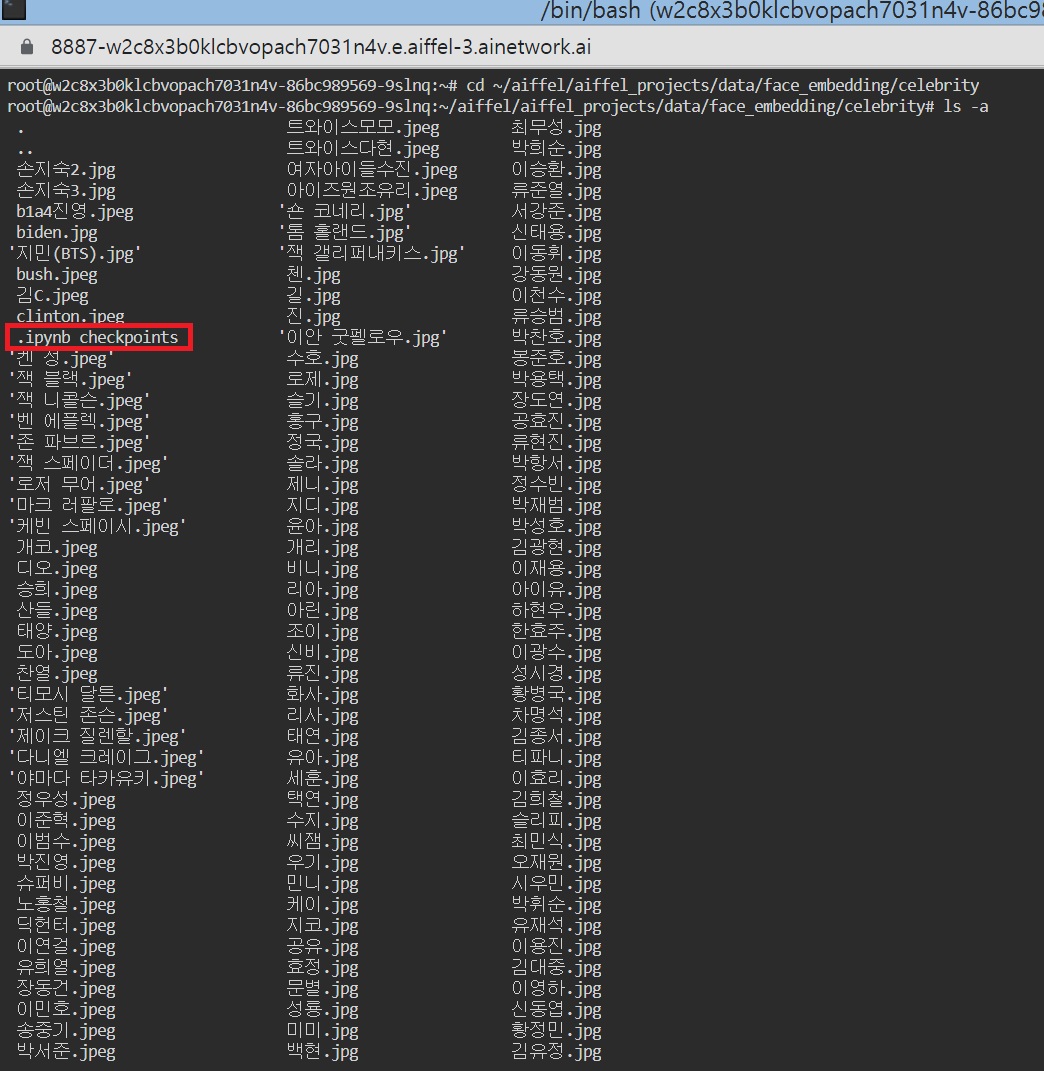

In [12]:
# 디렉터리 내 이미지 파일이 아닌 파일이 있는지 확인하기
# .ipynb_checkpoints 파일 하나만 해당하는 것을 확인했다
Image(os.getenv('HOME') + '/aiffel/aiffel_projects/data/face_embedding/notimage.png', width=500)

In [82]:
# 임베딩 값을 딕셔너리로 만들고, 제외된 이미지들을 출력
embedding_dict = get_embedding_dict(file_list)

제외된 이미지: 매드클라운
제외된 이미지: 산들
제외된 이미지: 신비
제외된 이미지: 이승환
제외된 이미지: 신태용
제외된 이미지: 도아
제외된 이미지: 제프리 힌턴
제외된 이미지: 한효주
제외된 이미지: 사무엘 L 잭슨
제외된 이미지: 김대명


In [81]:
# 이미지 파일이 아니거나, face detection이 되지 않은 경우 등을 제외한 이미지 개수
print(len(embedding_dict))

274


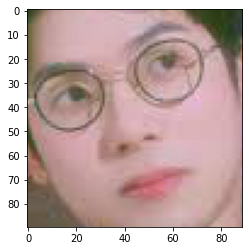

In [90]:
# 왜 embedding이 잘 되지 않았을까..? 살펴보지만 알 수 없다....
failed_path = os.path.join(dir_path, '매드클라운.jpeg')
failed = get_cropped_face(failed_path)
plt.imshow(failed)

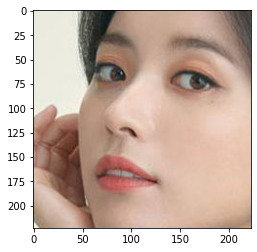

In [91]:
failed_path = os.path.join(dir_path, '한효주.jpg')
failed = get_cropped_face(failed_path)
plt.imshow(failed)

## 3. 닮은 얼굴 찾기

### 1) 임베딩 벡터 간 거리 계산하기

- **get_distance() 함수**
    - 이름 두 개를 파라미터로 받아서 딕셔너리에 저장된 임베딩 벡터 간의 차이를 구한다.
    - 차이는 np.linalg.norm()을 이용해 L2 distance로 계산한다.
   

In [62]:
# 두 임베딩 벡터 간 거리를 계산하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [65]:
get_distance('손지숙', '손지숙2')

0.3114783229233538

In [66]:
# 화장 + 보정 VS. 쌩얼
get_distance('손지숙', '손지숙3')    # 오~~~

0.34247492951060543

In [108]:
get_distance('김희철', '트와이스모모')    # 이제는 부질 없는..

0.46529162031483684

In [115]:
# 가장 다를 것 같은 두 사람을 골라서 그냥 한 번 거리를 살펴본다
get_distance('태연', 'obama')    # 오..

0.9084733578950713

<br>

### 2) 닮은 연예인을 순서대로 출력하기

- **get_nearest_face() 함수**
    - 파라미터로 받은 이름과 가장 닮은 사람 5명을 순서대로 정렬해서 표시한다.
    - 즉, 파라미터로 받은 이름의 얼굴 임베딩 벡터 값의 차이를 계산하여 받고,
    - 거리가 가장 짧은 사람 순서대로 딕셔너리를 정렬한다.
    - 정렬을 위해 get_sort_key() 함수를 호출한다.
    - 이 때 자기 자신은 제외한다. (거리 == 0.0)

In [116]:
# name과 가장 닮은 사람의 이미지와 거리를 가장 가까운 순서대로 정렬해서 표시
def get_nearest_face(name, top=5):
    sort_key = get_sort_key(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key(x[0]))
    
    for i in range(top+1):
        # 첫 번째는 자기 자신이므로 제외
        if i == 0:
            continue
        if sorted_faces[i]:
            print(f"순위 {i}: 이름({sorted_faces[i][0]}), 거리({sort_key(sorted_faces[i][0])})")

In [72]:
# name1은 미리 지정, name2는 호출 시에 인자로 받는다
def get_sort_key(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# sort_key = get_sort_key('손지숙')
# 이제 sort_key('obama')라고 호출 시 손지숙과 obama 사이 임베딩 벡터 거리를 계산한다

In [118]:
get_nearest_face('손지숙')

순위 1: 이름(손지숙2), 거리(0.3114783229233538)
순위 2: 이름(손지숙3), 거리(0.34247492951060543)
순위 3: 이름(강미나), 거리(0.35473178846793024)
순위 4: 이름(트와이스모모), 거리(0.38113929515528333)
순위 5: 이름(김고은), 거리(0.39098330688018157)


In [119]:
get_nearest_face('손지숙2')

순위 1: 이름(손지숙3), 거리(0.3045893799867313)
순위 2: 이름(손지숙), 거리(0.3114783229233538)
순위 3: 이름(나인뮤지스경리), 거리(0.36847956921790453)
순위 4: 이름(강미나), 거리(0.37373928178821425)
순위 5: 이름(승희), 거리(0.3820170314482025)


In [120]:
get_nearest_face('손지숙3')

순위 1: 이름(손지숙2), 거리(0.3045893799867313)
순위 2: 이름(손지숙), 거리(0.34247492951060543)
순위 3: 이름(강미나), 거리(0.37462011199800466)
순위 4: 이름(나인뮤지스경리), 거리(0.3879156509263447)
순위 5: 이름(채연), 거리(0.38870341605007136)


In [121]:
get_nearest_face('강미나')

순위 1: 이름(손지숙), 거리(0.35473178846793024)
순위 2: 이름(아이유), 거리(0.35741022880822293)
순위 3: 이름(지호), 거리(0.3670032908007422)
순위 4: 이름(승희), 거리(0.3670761870341075)
순위 5: 이름(제니), 거리(0.3684099377896761)


In [122]:
get_nearest_face('나인뮤지스경리')

순위 1: 이름(손지숙2), 거리(0.36847956921790453)
순위 2: 이름(강미나), 거리(0.385836707703084)
순위 3: 이름(손지숙3), 거리(0.3879156509263447)
순위 4: 이름(손지숙), 거리(0.39307068397610906)
순위 5: 이름(서현진), 거리(0.3993069711019737)


In [137]:
# 강미나와의 평균 거리 계산
total = [0.35473178846793024, 0.37373928178821425, 0.37462011199800466, 0.35473178846793024]
avg = sum(total) / len(total)

print("강미나와의 평균 유사도(거리):", avg)

강미나와의 평균 유사도(거리): 0.36445574268051983


In [138]:
# 경리와의 평균 거리 계산
total = [0.3879156509263447, 0.36847956921790453, 0.3879156509263447]
avg = sum(total) / len(total)

print("경리와의 평균 유사도(거리):", avg)

경리와의 평균 유사도(거리): 0.38143695702353125


<br>

### 강미나와의 평균 거리는 약 0.36, 경리와의 평균 거리는 약 0.38이 나왔다.

정말 비슷한지 사진을 직접 확인해보자

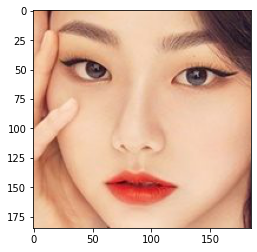

In [123]:
# 이쯤되면 한번 보고 가야겠다
similar_path = os.path.join(dir_path, '강미나.jpg')
similar = get_cropped_face(similar_path)
plt.imshow(similar)

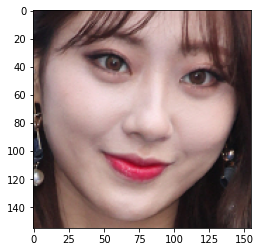

In [124]:
similar_path = os.path.join(dir_path, '나인뮤지스경리.jpg')
similar = get_cropped_face(similar_path)
plt.imshow(similar)

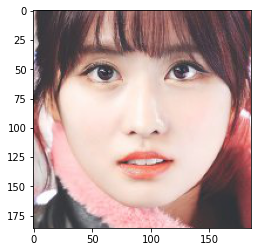

In [129]:
similar_path = os.path.join(dir_path, '트와이스모모.jpeg')
similar = get_cropped_face(similar_path)
plt.imshow(similar)

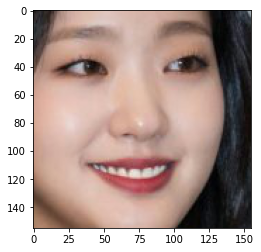

In [131]:
similar_path = os.path.join(dir_path, '김고은.jpeg')
similar = get_cropped_face(similar_path)
plt.imshow(similar)

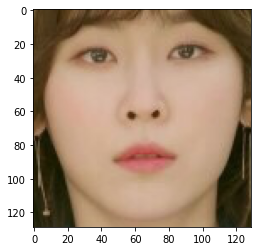

In [133]:
similar_path = os.path.join(dir_path, '서현진.jpg')
similar = get_cropped_face(similar_path)
plt.imshow(similar)

### 3) 사진 겹쳐 보기

얼마나 비슷한지 직접 겹쳐서 출력한 후 살펴보자

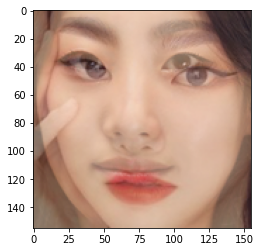

In [20]:
# 겹칠 이미지 불러오기
img1_path = os.path.join(dir_path, '손지숙.jpg')
img2_path = os.path.join(dir_path, '강미나.jpg')

# 비교를 위해 얼굴 영역만 자르기
img1 = get_cropped_face(img1_path)
img2 = get_cropped_face(img2_path)

# 이미지 사이즈 맞춰주기
w = img1.shape[1]
h = img1.shape[0]
img2 = cv2.resize(img2, (w, h))

weighted = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(weighted)

## 4. 결론 및 회고

### 1) 닮은 꼴 찾기 결과에 대해

- 내 사진을 총 3장 넣어서 확인했는데, 세 사진 모두에 닮은 꼴 Top 5로 등장한 사람은 강미나였다.
- 2개 사진에서 Top 5에 등장한 사람은 나인뮤지스 경리였다.
- 강미나와 나인뮤지스 경리의 닮은 꼴도 조회해보니, 두 사람 모두 1위로 내가 나왔다.
- 특히 나인뮤지스 경리의 경우에는 Top 5 안에 내 사진 3장이 모두 포함되었다.
- 정말 유사한 감이 있는지 직접 사진을 출력해보니, 사실 와닿지는 않았다.
- 마지막에 이미지를 겹쳐 보았는데, 사실 이목구비 위치를 맞추지 않아서 비교가 잘 되지 않았다. 나중에 시간을 더 들여서 코를 중심으로 위치를 맞추면 더 정확한 비교가 가능할 것 같다.
- 평면적인 이목구비만 비교하는 것이 얼굴의 유사도를 측정하는 데에 효과적이라고 느껴지지는 않았다.
- 딥러닝 모델을 이용한, 분명 더 나은 방법이 있을 것 같다. 더 공부해봐야겠다.

<br>

어쨌든 **결과적으로 나와 가장 닮은 연예인은 평균 거리가 약 0.36인 강미나와 평균 거리 약 0.38인 나인뮤지스 경리**이다.

어디선가 평균적으로 **similarity threshold** 를 0.4 ~ 0.5 정도를 기준으로 한다고 주워 봤던 것 같은데, 이 정도면 아주 닮았다고 판단한 것 같다.


### 2) 닮은 꼴 찾기 과정에 대해

- 이미지 데이터를 더 다양하게, 많이 확보했다면 더 의미 있고 재미 있는 결과가 나왔을지도 모르겠다.
- 이미지로부터 face detection은 성공했지만, face encoding에 실패하는 경우가 있었는데 이유를 파악하지 못했다. 더 공부해봐야겠다.